# Images: Resolution of the median filter

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import sys
# Add a new path with needed .py files.
sys.path.insert(0, 'C:\Users\Dominik\Documents\GitRep\kt-2015-DSPHandsOn\MedianFilter\Python') 

import functions
import gitInformation

In [1]:
% matplotlib inline

In [3]:
gitInformation.printInformation()

Information about this notebook
Date: 2015-11-11
Python Version: 2.7.10 |Anaconda 2.3.0 (64-bit)| (default, May 28 2015, 16:44:52) [MSC v.1500 64 bit (AMD64)]
Git directory: C:\Users\Dominik\Documents\GitRep\kt-2015-DSPHandsOn\.git
Current git SHA: fd91e9802ae0e5096f522c5b7b76f8c2346ec74e
Remotes: fork, origin, 
Current branch: master
fork remote URL: http://github.com/dowa4213/kt-2015-DSPHandsOn.git
origin remote URL: https://github.com/ktakagaki/kt-2015-DSPHandsOn.git


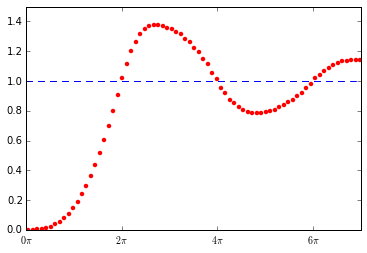

In [7]:
fig = plt.figure()
for y in range (0, 150):
    if y % 2 == 1:
        functions.ErrorPlotWindow(16, y*3, 16*128)
plt.savefig('Basic behavior.png',dpi=300)

As you can see, the resolution gets higher with a higher window length until the window legth is multiple of the sample rate.

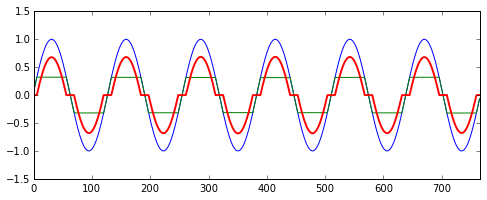

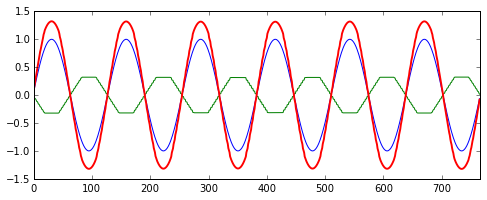

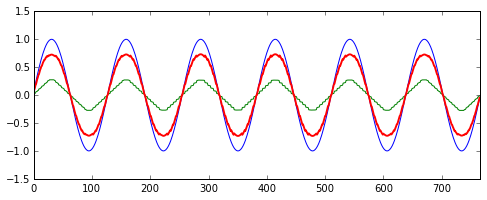

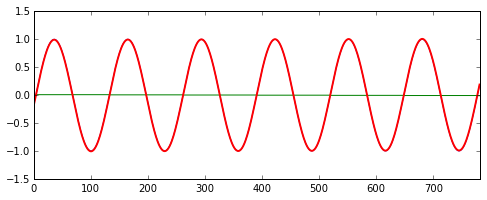

In [5]:
fig = plt.figure(1, figsize=(8, 3))
functions.medianSinPlot(16, 101, 16*128, 128*5+1, -128*5-1)
plt.savefig('Behavior with window length 101.png', dpi=300)

fig = plt.figure(2, figsize=(8, 3)) 
functions.medianSinPlot(16, 155, 16*128, 128*5+1, -128*5-1)
plt.savefig('Behavior with window length 155.png', dpi=300)

fig = plt.figure(3, figsize=(8, 3)) 
functions.medianSinPlot(16, 301, 16*128, 128*5+1, -128*5-1)
plt.savefig('Behavior with window length 301.png', dpi=300)

fig = plt.figure(4, figsize=(8, 3))
functions.medianSinPlot(16, 129, 16*129, 128*5+1, -128*5-1)
plt.savefig('Behavior with window length 129.png', dpi=300)

Here you can see, that the red wave is higher with a higher window length. When the window length gets much higher, the red wave gets smaller again. 